Project : Time Series Analysis of Bitcoin Historical data

1. Introduction

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Load your dataset
df = pd.read_csv('Bitcoin_history_rs.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 09, 2024","47,545.4","45,293.3","47,710.2","45,254.2",86.85K,4.97%
1,"Feb 08, 2024","45,293.3","44,346.2","45,579.2","44,336.4",66.38K,2.15%
2,"Feb 07, 2024","44,339.8","43,088.4","44,367.9","42,783.5",48.57K,2.91%
3,"Feb 06, 2024","43,087.7","42,697.6","43,375.5","42,566.8",33.32K,0.91%
4,"Feb 05, 2024","42,697.2","42,581.4","43,532.2","42,272.5",39.26K,0.27%


2. Data Preprocessing and Cleaning

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from prophet import Prophet

In [3]:
# Load the dataset
df = pd.read_csv('Bitcoin_history_rs.csv')

# Convert 'Price' column to float type
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Check for stationarity
result = adfuller (df ['Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Apply differencing
df['Price_diff'] = df['Price'] - df ['Price'].shift(1)

ADF Statistic: -2.569318
p-value: 0.099506


In [7]:
#Apply ARIMA model
model = ARIMA(df ['Price'], order = (5,1,0))
model_fit = model.fit()

#Apply SARIMA model
model = SARIMAX(df['Price'], order = (1, 1, 1), seasonal_order= (1, 1, 1, 12))
model_fit = model.fit(disp=False)

#Apply Simple Exponential Smoothing
model = SimpleExpSmoothing(df['Price'])
model_fit = model.fit()

#Apply Holt's Linear Trend Method
model = Holt(df['Price'])
model_fit = model.fit()

#Apply Holt-Winters Method
model = ExponentialSmoothing(df['Price'])
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [8]:
#calculate error metrics
y_true = df['Price'].values
y_pred = model_fit.fittedvalues.values
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = sqrt(mse)
print('MAE: %f' % mae)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

#Create a new dataframe for Prophet model
df_prophet = df[['Date', 'Price']].copy()
df_prophet.columns = ['ds', 'y'] # rename the columns for Prophet compatibility

#Use Prophet for forecasting
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe (periods=365)
forecast = model.predict(future)

MAE: 261.444741
MSE: 433502.809750
RMSE: 658.409303


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ypb2nn8/4k3_qabc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ypb2nn8/i8f_frgr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61703', 'data', 'file=/tmp/tmp6ypb2nn8/4k3_qabc.json', 'init=/tmp/tmp6ypb2nn8/i8f_frgr.json', 'output', 'file=/tmp/tmp6ypb2nn8/prophet_modelqzc0bl62/prophet_model-20241025075156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:51:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:51:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


3. Visualizing Time Series Data

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
# Load the dataset
df = pd.read_csv('Bitcoin_history_rs.csv', index_col = 'Date')

#Convert 'Price' column to float type
df ['Price'] = df ['Price'].str.replace(',', '').astype(float)

#Apply differencing
df['Price_diff'] = df['Price'] - df ['Price'].shift(1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4955 entries, Feb 09, 2024 to Jul 18, 2010
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       4955 non-null   float64
 1   Open        4955 non-null   object 
 2   High        4955 non-null   object 
 3   Low         4955 non-null   object 
 4   Vol.        4955 non-null   object 
 5   Change %    4955 non-null   object 
 6   Price_diff  4954 non-null   float64
dtypes: float64(2), object(5)
memory usage: 309.7+ KB


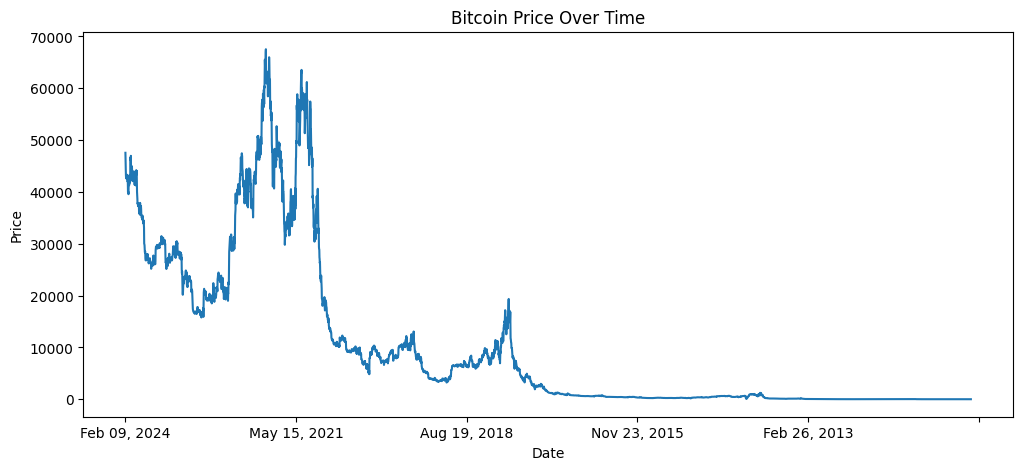

In [13]:
#Create a line plot of the time series data
df['Price'].plot(figsize=(12, 5))
df['Price']
plt.title('Bitcoin Price Over Time')
plt.ylabel('Price')
plt.show()

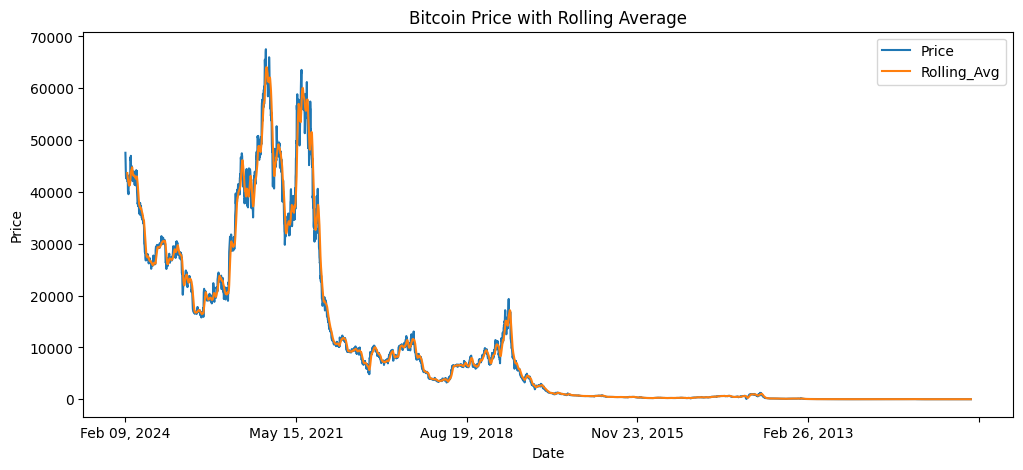

In [14]:
# Calculate and plot the rolling average
df['Rolling_Avg'] = df['Price'].rolling(window=12).mean()
df[['Price', 'Rolling_Avg']].plot(figsize=(12, 5))
plt.title('Bitcoin Price with Rolling Average')
plt.ylabel('Price')
plt.show()

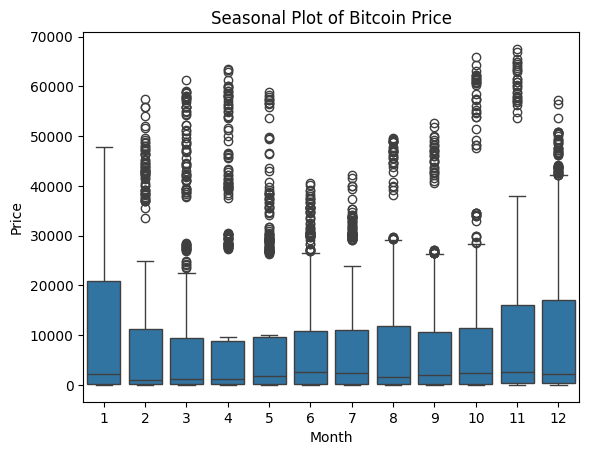

In [16]:
# Ensure the index is in datetime format
df.index = pd.to_datetime(df.index)

#Create a new column 'Month in your dataframe
df['Month'] = df.index.month

#Now you can create your boxplot
sns.boxplot(x='Month', y='Price', data=df)
plt.title('Seasonal Plot of Bitcoin Price')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

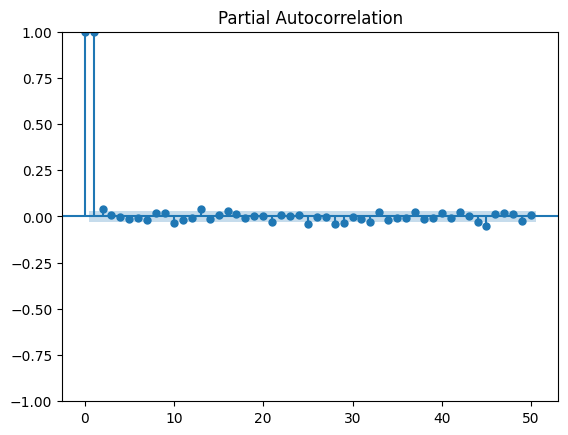

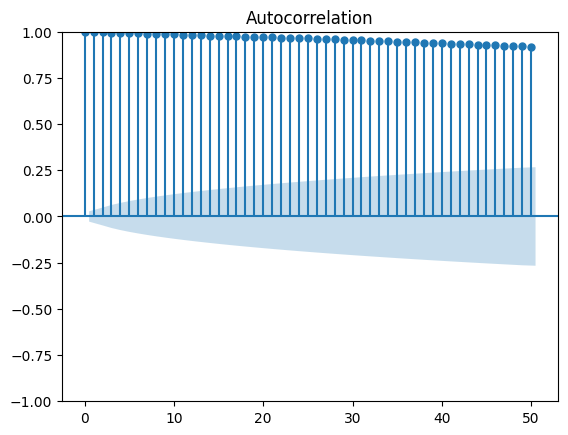

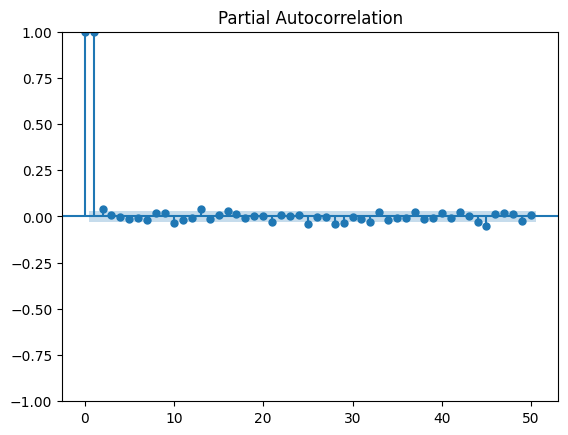

In [18]:
 #Create autocorrelation and partial autocorrelation plots
 from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
 plot_acf(df['Price'], lags=50)
 plot_pacf(df ['Price'], lags=50)

In [19]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(df ['Price'])

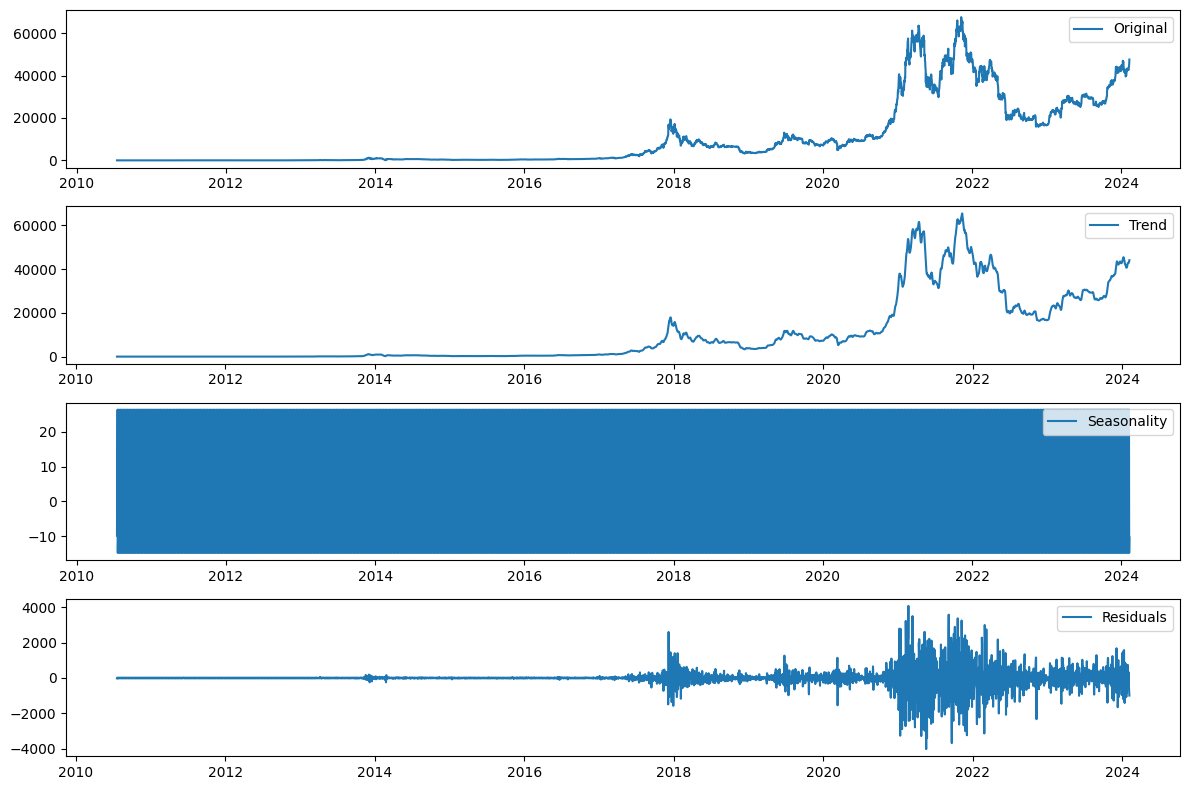

In [20]:
#Plot the original time series, trend, seasonality, and residuals
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['Price'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

4. Creating Forecasting Models

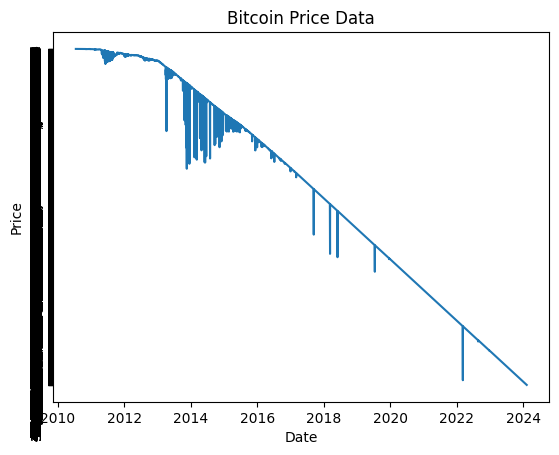

In [21]:
#1.ARIMA Modeling:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

#Load the Bitcoin price data
data = pd.read_csv('Bitcoin_history_rs.csv')

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

#Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Plot the Bitcoin prices
plt.plot(data['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.yticks(rotation=90)
plt.title('Bitcoin Price Data')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inf

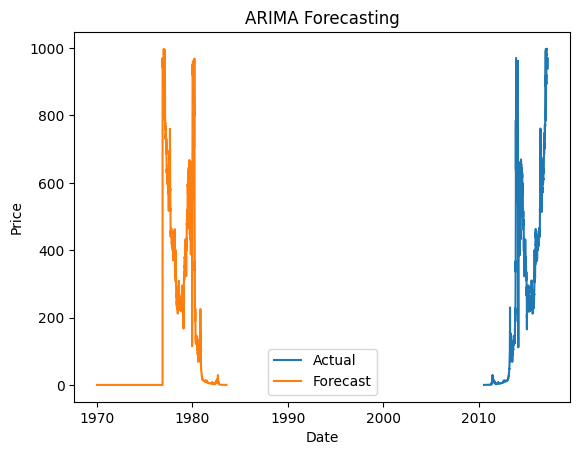

In [23]:
# Fit the ARIMA model
# Convert 'Price' column to numeric type
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

model = ARIMA(data['Price'], order=(1, 1, 1))
model_fit = model.fit()

#Generate in-sample forecasts
forecast_arima = model_fit.predict(start=1, end=len(data), typ='levels')

#Plot the original data and the forecasts
plt.plot(data['Price'], label='Actual')
plt.plot(forecast_arima, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show();

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction r

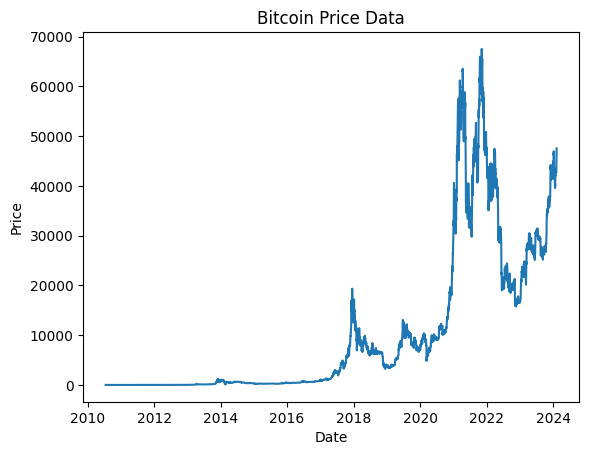

In [24]:
#2. SARIMA Modeling:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the Bitcoin price data
data = pd.read_csv('Bitcoin_history_rs.csv')

#Convert 'Price' column to float type
data['Price'] = data['Price'].str.replace(',', '').astype(float)

#Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

#Set the 'Date' column as the index
data.set_index('Date', inplace=True)

#Generate in-sample forecasts
#Fit the SARIMA model
model = SARIMAX(data['Price'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
model_fit = model.fit()

#Generate in-sample forecasts
forecast_sarima = model_fit.predict(start=1, end=len(data), typ='levels')

#Plot the Bitcoin prices
plt.plot(data['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Data')
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ypb2nn8/egj9no9x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6ypb2nn8/5ewqy19l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75196', 'data', 'file=/tmp/tmp6ypb2nn8/egj9no9x.json', 'init=/tmp/tmp6ypb2nn8/5ewqy19l.json', 'output', 'file=/tmp/tmp6ypb2nn8/prophet_model_hfuhtxs/prophet_model-20241025085451.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:54:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:54:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


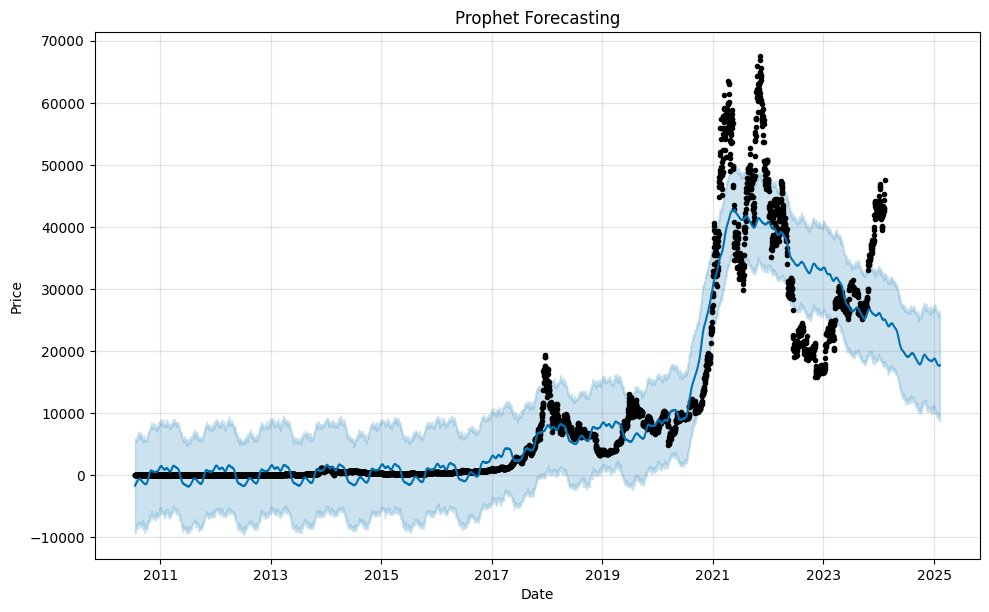

In [26]:
#3. Prophet Modeling:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

#Load the Bitcoin price data
data = pd.read_csv('Bitcoin_history_rs.csv')
data_prophet = data.copy()

#Rename the columns for Prophet
data_prophet = data_prophet.rename(columns={'Date': 'ds', 'Price': 'y'})

#Convert 'Price' column to float type
data_prophet['y'] = data_prophet['y'].str.replace(',', '').astype(float)

#Create a Prophet model
model = Prophet()

# Fit the model to the Bitcoin price data
model.fit(data_prophet)

#Generate in-sample forecasts
future = model.make_future_dataframe (periods=365)
forecast_prophet = model.predict(future)

#Plot the forecasted values
model.plot(forecast_prophet, xlabel='Date', ylabel='Price')
plt.title('Prophet Forecasting')
plt.show()

5. Predicting Future Bitcoin Prices

In [27]:
#Load the Bitcoin price data
data = pd.read_csv('Bitcoin_history_rs.csv')

#Convert 'Price' column to float type
data['Price'] = data['Price'].str.replace(',', '').astype(float)

#Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

#Set the 'Date' column as the index
data.set_index('Date', inplace=True)

#Calculate MAE and RMSE for ARIMA model
mae_arima = mean_absolute_error(data['Price'], forecast_arima)
rmse_arima = sqrt(mean_squared_error(data['Price'], forecast_arima))
print("ARIMA Model-MAE: ", mae_arima)
print("ARIMA Model-RMSE: ", rmse_arima)

ARIMA Model-MAE:  10240.163961601538
ARIMA Model-RMSE:  18429.177072407394


In [29]:
#Calculate MAE and RMSE for Prophet model
forecast_prophet_matched = forecast_prophet['yhat'][:len(data_prophet)]
mae_prophet = mean_absolute_error(data_prophet['y'], forecast_prophet_matched)
rmse_prophet = sqrt(mean_squared_error(data_prophet['y'], forecast_prophet_matched ))
print("Prophet Model-MAE: ", mae_prophet)
print("Prophet Model-RMSE: ", rmse_prophet)

Prophet Model-MAE:  20102.962860975756
Prophet Model-RMSE:  25291.475593100302


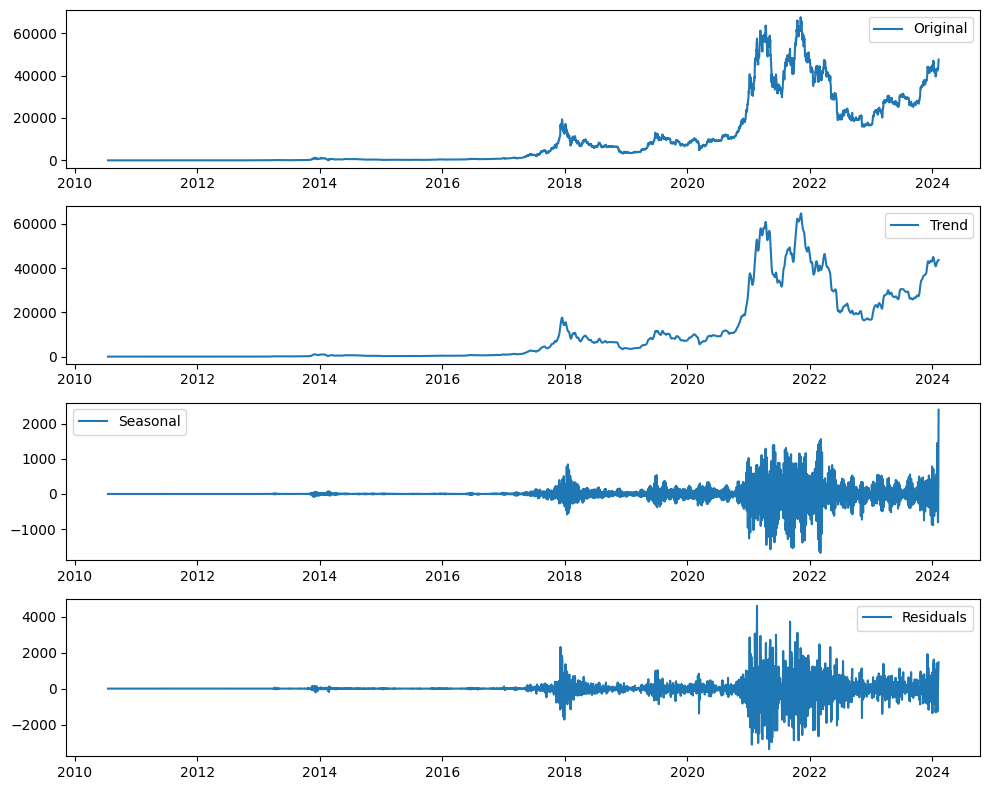

In [33]:
# Seasonality Decomposition (STL):
from statsmodels.tsa.seasonal import STL

#Load the Bitcoin price data
data = pd.read_csv('Bitcoin_history_rs.csv')

# Convert 'Price' column to float type
data['Price'] = data['Price'].str.replace(',', '').astype(float)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

#Set the 'Date' column as the index
data.set_index('Date', inplace=True)

#Perform STL decomposition
decomposition = STL(data['Price'])
result = decomposition.fit()

# Plot the decomposition components
fig, (ax1, ax2, ax3, ax4) = plt.subplots (4, 1, figsize=(10, 8))
ax1.plot(data['Price'], label='Original')
ax1.legend()
ax2.plot(result.trend, label='Trend')
ax2.legend()
ax3.plot(result.seasonal, label='Seasonal')
ax3.legend()
ax4.plot(result.resid, label='Residuals')
ax4.legend()
plt.tight_layout()
plt.show()

In [35]:
# Anomaly Detection (Z-Score)
import pandas as pd
import numpy as np

# Load the Bitcoin price data
data = pd.read_csv('Bitcoin_history_rs.csv')

# Convert 'Price' column to float type
data['Price'] = data['Price'].str.replace(',', '').astype(float)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Calculate z-score
z_scores = (data['Price'] - data['Price'].mean()) / data['Price'].std()

# Set the threshold for anomaly detection
threshold = 2.0

# Detect anomalies
anomalies = data[np.abs(z_scores) > threshold]

# Print the detected anomalies
print("Anomalies:")
print(anomalies)

Anomalies:
              Price      Open      High       Low     Vol. Change %
Date                                                               
2024-02-09  47545.4  45,293.3  47,710.2  45,254.2   86.85K    4.97%
2024-02-08  45293.3  44,346.2  45,579.2  44,336.4   66.38K    2.15%
2024-02-07  44339.8  43,088.4  44,367.9  42,783.5   48.57K    2.91%
2024-02-06  43087.7  42,697.6  43,375.5  42,566.8   33.32K    0.91%
2024-02-05  42697.2  42,581.4  43,532.2  42,272.5   39.26K    0.27%
...             ...       ...       ...       ...      ...      ...
2021-02-12  47371.7  47,995.0  48,927.4  46,218.6  133.73K   -1.29%
2021-02-11  47990.7  44,834.8  48,622.1  44,041.1  145.77K    7.04%
2021-02-10  44836.0  46,507.8  47,295.3  43,800.5  151.83K   -3.60%
2021-02-09  46508.6  46,396.4  48,143.5  45,104.7  193.87K    0.24%
2021-02-08  46395.7  38,853.6  46,596.4  38,057.0  248.47K   19.41%

[380 rows x 6 columns]


In [36]:
# LSTM Model for Time Series Forecasting:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the Bitcoin price data
data = pd.read_csv('Bitcoin_history_rs.csv')

# Convert 'Price' column to float type
data['Price'] = data['Price'].str.replace(',', '').astype(float)

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Prepare the data for LSTM
sequence_length = 10
X = []
y = []
# Assume 'Price' is the column in your dataframe
for i in range(len(data)-sequence_length):
  X.append(data['Price'].values[i:i+sequence_length])
  y.append(data['Price'].values[i+sequence_length])
X = np.array(X)
y = np.array(y)

# Reshape the input data for LSTM
X = np.reshape(X,(X.shape[0], X.shape[1], 1))

# Create and train the LSTM model
model = Sequential()
model.add(LSTM (50, input_shape=(sequence_length, 1)))
model.add(Dense (1))
model.compile(loss='mse', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=32)

# Generate forecasts
forecast = model.predict(X)

# Print the forecasts
print("Forecasts:")
print(forecast)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 343405152.0000
Epoch 2/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 338810848.0000
Epoch 3/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 331247680.0000
Epoch 4/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 340274176.0000
Epoch 5/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 342324960.0000
Epoch 6/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 346088928.0000
Epoch 7/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 320723744.0000
Epoch 8/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 336987584.0000
Epoch 9/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 357328096.0000
Epoch 10/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 342331616.0000
Epoch 11/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 349763200.0000
Epoch 12/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 327843040.0000
Epoch 13/100
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 328735584.0000
Epoch 14/100
155/155